# Sales Prediction Model for Walmart Using Time Series Analysis and Regression Models

 **A. Problem Statement**</br>
Sales at Walmart vary significantly across different times of the year due to seasonal effects and holidays. Some departments experience higher or lower sales based on these seasonal patterns.

The top four spikes in sales are typically observed around Christmas, Thanksgiving, the Super Bowl, and Labor Day. If the company fails to anticipate these seasonal trends, it could lead to stockouts or overstocking, resulting in financial losses.

For instance, although Christmas is celebrated at the end of December, most customers tend to shop in the 51st week. Misjudging such behavior can disrupt inventory planning and customer satisfaction.

**Accurate sales forecasting is essential for:**

-Strategic stock planning

-Revenue estimation

-Investment decisions

-Improving marketing campaigns

Additionally, meeting or exceeding sales targets early in the season can positively influence investor confidence and boost stock value.

**B. Goal & Objective**<br>
**Goal:**
Predict Weekly Sales for Walmart Stores

**Objective:**

Build a machine learning model to predict weekly sales, focusing on holiday impact.

Help Walmart make data-driven decisions for stock arrangements, marketing strategies, and revenue forecasting.

Enable the company to set realistic targets before high-sales seasons begin.

**C. Business Metrics**<br>
Increase Sales in several departments in the store

Githublink:https://github.com/Sharonasam1576/Machine_learning-.git

### **A. Import Library & Dataset**

In [102]:
import pandas as pd
import numpy as np

In [103]:
Train_Walmart = pd.read_csv('train - Walmart Sales Forecast.csv')
Test_Walmart = pd.read_csv('test - Walmart Sales Forecast.csv')
Stores_Walmart = pd.read_csv('stores - Walmart Sales Forecast.csv')
Features_Walmart = pd.read_csv('features - Walmart Sales Forecast.csv')

### **DATA EXPLORATION**

**1.TEST DATA**

In [104]:
Test_Walmart.head(10)

,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False
2,1,1,2012-11-16,False
3,1,1,2012-11-23,True
4,1,1,2012-11-30,False
5,1,1,2012-12-07,False
6,1,1,2012-12-14,False
7,1,1,2012-12-21,False
8,1,1,2012-12-28,True
9,1,1,2013-01-04,False


In [105]:
Test_Walmart.tail(10)

,Store,Dept,Date,IsHoliday
115054,45,98,2013-05-24,False
115055,45,98,2013-05-31,False
115056,45,98,2013-06-07,False
115057,45,98,2013-06-14,False
115058,45,98,2013-06-21,False
115059,45,98,2013-06-28,False
115060,45,98,2013-07-05,False
115061,45,98,2013-07-12,False
115062,45,98,2013-07-19,False
115063,45,98,2013-07-26,False


In [106]:
len(Test_Walmart)

115064

In [107]:
Test_Walmart.describe()

,Store,Dept
count,115064.000000,115064.000000
mean,22.238207,44.339524
std,12.809930,30.656410
min,1.000000,1.000000
25%,11.000000,18.000000
50%,22.000000,37.000000
75%,33.000000,74.000000
max,45.000000,99.000000


In [108]:
Test_Walmart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115064 entries, 0 to 115063
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Store      115064 non-null  int64 
 1   Dept       115064 non-null  int64 
 2   Date       115064 non-null  object
 3   IsHoliday  115064 non-null  bool  
dtypes: bool(1), int64(2), object(1)
memory usage: 2.7+ MB


In [109]:
Test_Walmart.isna().sum()

Store        0
Dept         0
Date         0
IsHoliday    0
dtype: int64

In [110]:
Test_Walmart.duplicated().sum()

0

In [111]:
Holiday=Test_Walmart[Test_Walmart['IsHoliday']==True]
Holiday

,Store,Dept,Date,IsHoliday
3,1,1,2012-11-23,True
8,1,1,2012-12-28,True
14,1,1,2013-02-08,True
42,1,2,2012-11-23,True
47,1,2,2012-12-28,True
...,...,...,...,...
114994,45,97,2012-12-28,True
115000,45,97,2013-02-08,True
115028,45,98,2012-11-23,True
115033,45,98,2012-12-28,True


In [112]:
pd.concat([Test_Walmart.head(),Test_Walmart.tail()])

,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False
2,1,1,2012-11-16,False
3,1,1,2012-11-23,True
4,1,1,2012-11-30,False
115059,45,98,2013-06-28,False
115060,45,98,2013-07-05,False
115061,45,98,2013-07-12,False
115062,45,98,2013-07-19,False
115063,45,98,2013-07-26,False


**2.TRAIN DATA**

In [113]:
Train_Walmart.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [114]:
Train_Walmart.tail()

,Store,Dept,Date,Weekly_Sales,IsHoliday
421565,45,98,2012-09-28,508.37,False
421566,45,98,2012-10-05,628.10,False
421567,45,98,2012-10-12,1061.02,False
421568,45,98,2012-10-19,760.01,False
421569,45,98,2012-10-26,1076.80,False


In [115]:
Train_Walmart.describe()

,Store,Dept,Weekly_Sales
count,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123
std,12.785297,30.492054,22711.183519
min,1.000000,1.000000,-4988.940000
25%,11.000000,18.000000,2079.650000
50%,22.000000,37.000000,7612.030000
75%,33.000000,74.000000,20205.852500
max,45.000000,99.000000,693099.360000


In [116]:
Train_Walmart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB


In [117]:
Train_Walmart.isna().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
dtype: int64

In [118]:
Train_Walmart.duplicated().sum()

0

In [119]:
Holiday=Train_Walmart[Train_Walmart ['IsHoliday']==True]
Holiday

,Store,Dept,Date,Weekly_Sales,IsHoliday
1,1,1,2010-02-12,46039.49,True
31,1,1,2010-09-10,18194.74,True
42,1,1,2010-11-26,18820.29,True
47,1,1,2010-12-31,19124.58,True
53,1,1,2011-02-11,37887.17,True
...,...,...,...,...,...
421510,45,98,2011-09-09,1092.66,True
421521,45,98,2011-11-25,794.62,True
421526,45,98,2011-12-30,553.21,True
421532,45,98,2012-02-10,770.86,True


In [120]:
pd.concat([Train_Walmart.head(),Train_Walmart.tail()])

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False
421565,45,98,2012-09-28,508.37,False
421566,45,98,2012-10-05,628.10,False
421567,45,98,2012-10-12,1061.02,False
421568,45,98,2012-10-19,760.01,False
421569,45,98,2012-10-26,1076.80,False


* **Descriptive Statistics**

Train_numerical & Train_categorical are made for observed the statistical information of Train_Walmart dataset

In [121]:
Train_numerical = Train_Walmart[['Store', 'Dept', 'Weekly_Sales']]
Train_categorical = Train_Walmart[['IsHoliday']]

In [122]:
Train_numerical.describe()

,Store,Dept,Weekly_Sales
count,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123
std,12.785297,30.492054,22711.183519
min,1.000000,1.000000,-4988.940000
25%,11.000000,18.000000,2079.650000
50%,22.000000,37.000000,7612.030000
75%,33.000000,74.000000,20205.852500
max,45.000000,99.000000,693099.360000


In [123]:
Train_numerical.describe()

,Store,Dept,Weekly_Sales
count,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123
std,12.785297,30.492054,22711.183519
min,1.000000,1.000000,-4988.940000
25%,11.000000,18.000000,2079.650000
50%,22.000000,37.000000,7612.030000
75%,33.000000,74.000000,20205.852500
max,45.000000,99.000000,693099.360000


In [124]:
# Modus/Mode
Weekly_Sales = Train_Walmart['Weekly_Sales']
Weekly_Sales.mode()[0]
print (f"Weekly_Sales :{Weekly_Sales.mode()[0]}")

# Q1
# The data at the 25th percentile
print ('Q1 :', Weekly_Sales.quantile(0.25))

# Q2
# The data at the 50th percentile
print ('Q2 :', Weekly_Sales.quantile(0.5))

# Q3
# The data at the 75th percentile
print ('Q3 :', Weekly_Sales.quantile(0.75))

# Q4
# The data at the 100th percentile
print ('Q4 :', Weekly_Sales.quantile(1))

# Range
# Range of values from maximum to minimum
print('Range:', Weekly_Sales.max()-Weekly_Sales.min())

# Variance
print ('Variance :', Weekly_Sales.var())

# Standart Deviation
print ('Standar Deviasi :', Weekly_Sales.std())

# Interquartile range is the distance from Q3 to Q1.
# It is useful for identifying outliers.
print('Inter Quartile Range (IQR):',Weekly_Sales.quantile(0.75)-Weekly_Sales.quantile(0.25))

Weekly_Sales :10.0
Q1 : 2079.6499999999996
Q2 : 7612.03
Q3 : 20205.8525
Q4 : 693099.36
Range: 698088.2999999999
Variance : 515797856.84110695
Standar Deviasi : 22711.18351916313
Inter Quartile Range (IQR): 18126.2025


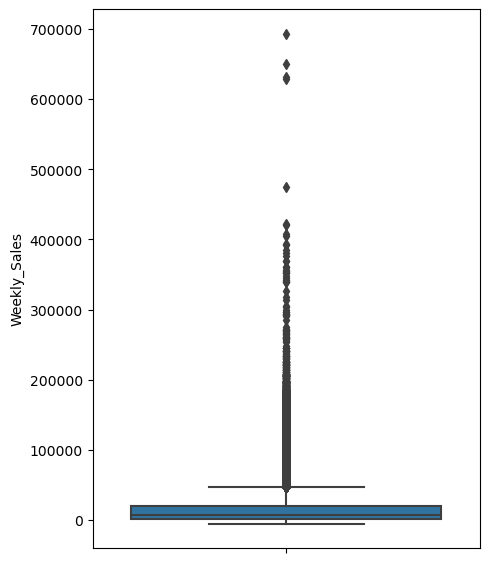

In [125]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (5,7))
sns.boxplot(y=Weekly_Sales,data = Train_Walmart)
plt.show()

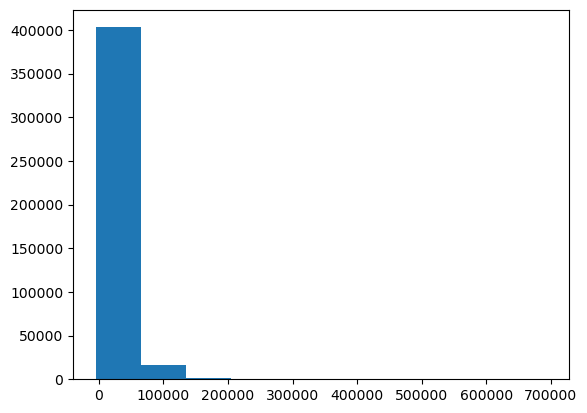

In [126]:
plt.hist(Train_Walmart['Weekly_Sales'])
plt.show()

In [127]:
col="Weekly_Sales"
# Calculate mean, median, and mode values
mean_val = Train_Walmart[col].mean()
median_val = Train_Walmart[col].median()
mode_val = Train_Walmart[col].mode().iloc[0]

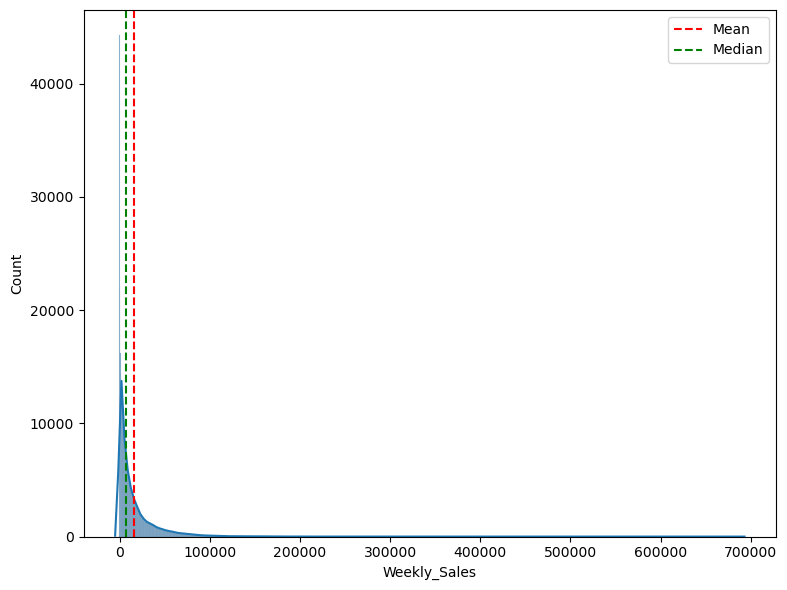

In [128]:
# Create Plot
fig, ax = plt.subplots(figsize=(8,6))
sns.histplot(data=Train_Walmart, x=col, ax=ax, kde=True)

# Add vertical lines for mean, median, and mode
ax.axvline(x=mean_val, color='r', linestyle='dashed', label='Mean')
ax.axvline(x=median_val, color='g', linestyle='dashed', label='Median')

# Showing Legenda
ax.legend()

# Showing Plot
plt.tight_layout()
plt.show()

**3. Stores Data**

In [129]:
Stores_Walmart.head(5)

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [130]:
Stores_Walmart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Store   45 non-null     int64 
 1   Type    45 non-null     object
 2   Size    45 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.2+ KB


In [131]:
Stores_Walmart.isna().sum()

Store    0
Type     0
Size     0
dtype: int64

In [132]:
Stores_Walmart.duplicated().sum()

0

In [133]:
Stores_Walmart.describe()

,Store,Size
count,45.000000,45.000000
mean,23.000000,130287.600000
std,13.133926,63825.271991
min,1.000000,34875.000000
25%,12.000000,70713.000000
50%,23.000000,126512.000000
75%,34.000000,202307.000000
max,45.000000,219622.000000


In [134]:
Stores_Walmart['Type'].value_counts()
print (f"Type :{Stores_Walmart['Type'].value_counts()}")

Type :A    22
B    17
C     6
Name: Type, dtype: int64


In [135]:
Stores_Walmart['Type'].describe()

count     45
unique     3
top        A
freq      22
Name: Type, dtype: object

In [136]:
Store = Stores_Walmart['Store']
Store.mode()[0]
print (f"Store :{Store.mode()[0]}")
       
Size = Stores_Walmart['Size']
Size.mode()[0]
print (f"Size :{Size.mode()[0]}")

Store :1
Size :39690


In [137]:
range_per_store = Stores_Walmart.groupby('Type')['Size'].agg(lambda x: x.max() - x.min())

print(range_per_store)

Type
A    179932
B    105292
C      3298
Name: Size, dtype: int64


In [138]:
# Calculating the maximum value for each store type
max_per_store = Stores_Walmart.groupby('Type')['Size'].max()
print("Maximum Value per Store Type:\n", max_per_store)

# Calculating the minimum value for each store type
min_per_store = Stores_Walmart.groupby('Type')['Size'].min()
print("\nMinimum Value per Store Type:\n", min_per_store)

Maximum Value per Store Type:
 Type
A    219622
B    140167
C     42988
Name: Size, dtype: int64

Minimum Value per Store Type:
 Type
A    39690
B    34875
C    39690
Name: Size, dtype: int64


**4. Features Data**

In [139]:
Features_Walmart.head(5)

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [140]:
Features_Walmart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB


In [141]:
Features_Walmart.duplicated().sum()

0

In [142]:
Features_Walmart.isna().sum()

Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64

In [143]:
Features_numerical = ['Temperature','Fuel_Price','CPI','Unemployment']
Features_categorical = ['IsHoliday']

Features_numerical = Features_Walmart[['Temperature','Fuel_Price','CPI','Unemployment']]
Features_categorical = Features_Walmart[['IsHoliday']]

In [144]:
Features_numerical.describe()

,Temperature,Fuel_Price,CPI,Unemployment
count,8190.000000,8190.000000,7605.000000,7605.000000
mean,59.356198,3.405992,172.460809,7.826821
std,18.678607,0.431337,39.738346,1.877259
min,-7.290000,2.472000,126.064000,3.684000
25%,45.902500,3.041000,132.364839,6.634000
50%,60.710000,3.513000,182.764003,7.806000
75%,73.880000,3.743000,213.932412,8.567000
max,101.950000,4.468000,228.976456,14.313000


In [145]:
Features_categorical.describe()

,IsHoliday
count,8190
unique,2
top,False
freq,7605


In [146]:
Temperature = Features_Walmart['Temperature']
Temperature.mode()[0]
print (f"Temperature :{Temperature.mode()[0]}")
       
Fuel_Price = Features_Walmart['Fuel_Price']
Fuel_Price.mode()[0]
print (f"Fuel_Price :{Fuel_Price.mode()[0]}")

CPI = Features_Walmart['CPI']
CPI.mode()[0]
print (f"CPI :{CPI.mode()[0]}")

Unemployment = Features_Walmart['Unemployment']
Unemployment.mode()[0]
print (f"Unemployment :{Unemployment.mode()[0]}")

Temperature :50.43
Fuel_Price :3.417
CPI :132.7160968
Unemployment :8.099


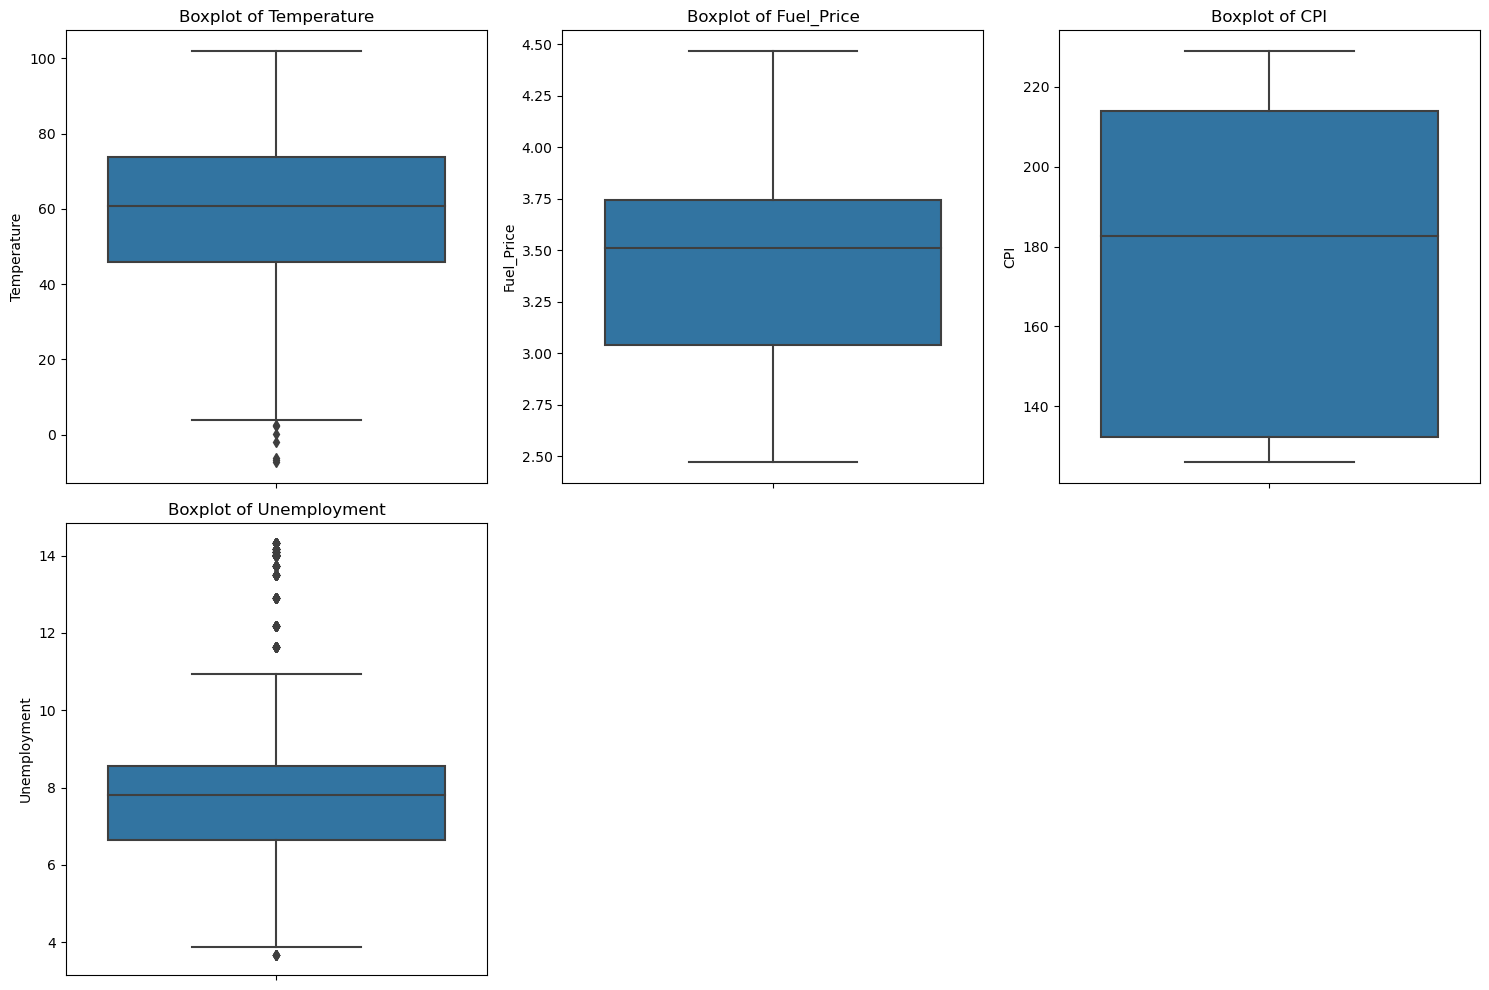

In [147]:
plt.figure(figsize=(15, 10))

num_cols = len(Features_numerical.columns)

for i, column in enumerate(Features_numerical.columns):
    plt.subplot(num_cols // 3 + 1, 3, i + 1)
    sns.boxplot(data=Features_numerical, y=column)
    plt.title(f'Boxplot of {column}')
    plt.ylabel(column)

plt.tight_layout()
plt.show()


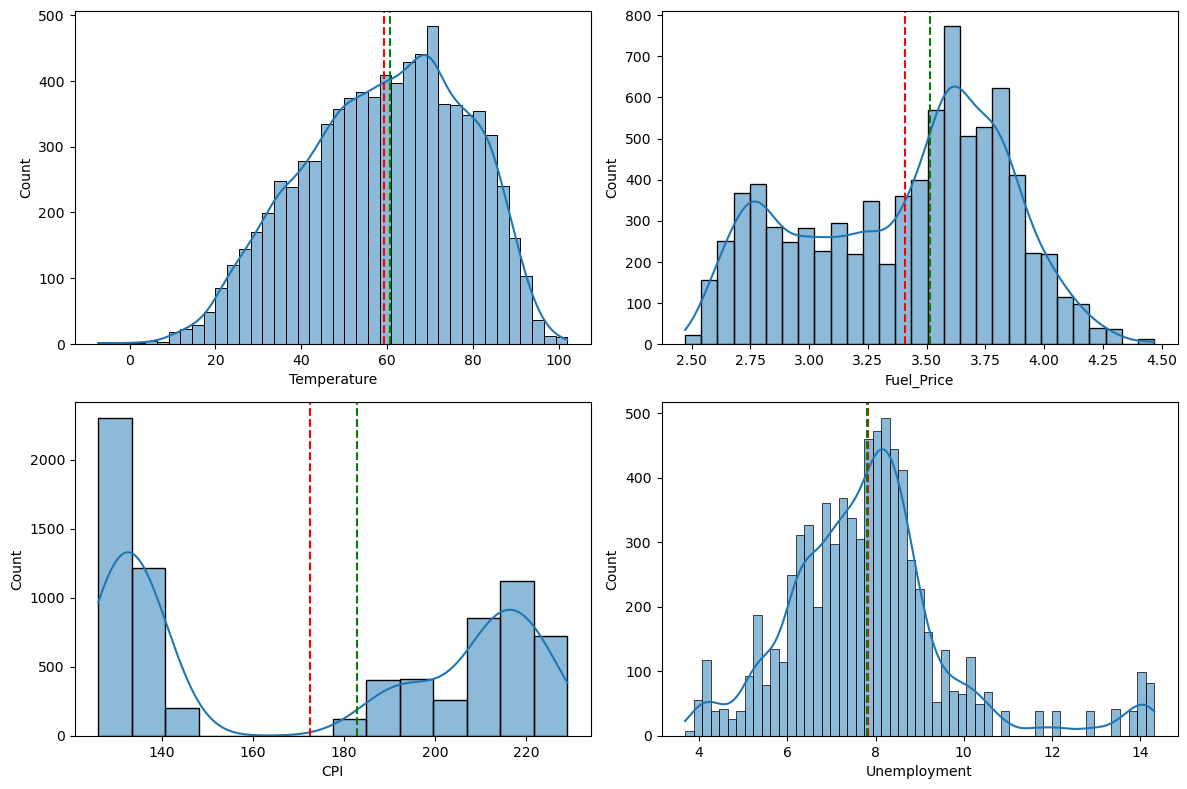

In [148]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12,8))
for i, col in enumerate(Features_numerical.columns):
  if col == 'Temperature' or col == 'CPI' or col == 'Unemployment'or col == 'Fuel_Price':


    # Calculate mean, median, and mode
    mean_val = Features_numerical[col].mean()
    median_val = Features_numerical[col].median()
    mode_val = Features_numerical[col].mode().iloc[0]

    # Correctly access the subplot using row and column indices
    row = i // 2  # Calculate row index
    col_index = i % 2  # Calculate column index
    ax = axes[row, col_index]  # Access the subplot using row and column indices

    sns.histplot(data=Features_numerical, x=col, ax=ax, kde=True)

    # Add vertical lines for mean, median, and mode
    ax.axvline(x=mean_val, color='r', linestyle='dashed', label='Mean')
    ax.axvline(x=median_val, color='g', linestyle='dashed', label='Median')


plt.tight_layout()
plt.show()

 **C. Merge Dataset**

In [149]:
df = Train_Walmart.merge(Features_Walmart, on=['Store', 'Date'], how='inner').merge(Stores_Walmart, on=['Store'], how='inner')
df.head(5)

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
1,1,2,2010-02-05,50605.27,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
2,1,3,2010-02-05,13740.12,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
3,1,4,2010-02-05,39954.04,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
4,1,5,2010-02-05,32229.38,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315


In [150]:
df.shape

(421570, 17)

In [151]:
df.drop(['IsHoliday_y'], axis=1,inplace=True)

In [152]:
df.rename(columns={'IsHoliday_x':'IsHoliday'},inplace=True)

In [153]:
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
1,1,2,2010-02-05,50605.27,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
2,1,3,2010-02-05,13740.12,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
3,1,4,2010-02-05,39954.04,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
4,1,5,2010-02-05,32229.38,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315


In [154]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
 5   Temperature   421570 non-null  float64
 6   Fuel_Price    421570 non-null  float64
 7   MarkDown1     150681 non-null  float64
 8   MarkDown2     111248 non-null  float64
 9   MarkDown3     137091 non-null  float64
 10  MarkDown4     134967 non-null  float64
 11  MarkDown5     151432 non-null  float64
 12  CPI           421570 non-null  float64
 13  Unemployment  421570 non-null  float64
 14  Type          421570 non-null  object 
 15  Size          421570 non-null  int64  
dtypes: bool(1), float64(10), int64(3), object(2)
memory usage: 51.9+ MB


In [155]:
df.shape

(421570, 16)

In [156]:
# Checking for missing values in the dataset
def check_missing_values(df):
    missing_values = df.isnull().sum()
    if missing_values.any():
        print("Columns with missing values:")
        print(missing_values[missing_values > 0])
    else:
        print("There are no missing values in the dataset.")
check_missing_values(df)

Columns with missing values:
MarkDown1    270889
MarkDown2    310322
MarkDown3    284479
MarkDown4    286603
MarkDown5    270138
dtype: int64


In [157]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Store,421570.0,22.200546,12.785297,1.000,11.000000,22.00000,33.000000,45.000000
Dept,421570.0,44.260317,30.492054,1.000,18.000000,37.00000,74.000000,99.000000
Weekly_Sales,421570.0,15981.258123,22711.183519,-4988.940,2079.650000,7612.03000,20205.852500,693099.360000
Temperature,421570.0,60.090059,18.447931,-2.060,46.680000,62.09000,74.280000,100.140000
Fuel_Price,421570.0,3.361027,0.458515,2.472,2.933000,3.45200,3.738000,4.468000
MarkDown1,150681.0,7246.420196,8291.221345,0.270,2240.270000,5347.45000,9210.900000,88646.760000
MarkDown2,111248.0,3334.628621,9475.357325,-265.760,41.600000,192.00000,1926.940000,104519.540000
MarkDown3,137091.0,1439.421384,9623.078290,-29.100,5.080000,24.60000,103.990000,141630.610000
MarkDown4,134967.0,3383.168256,6292.384031,0.220,504.220000,1481.31000,3595.040000,67474.850000
MarkDown5,151432.0,4628.975079,5962.887455,135.160,1878.440000,3359.45000,5563.800000,108519.280000


In [158]:
numeric=['int8', 'int16', 'int32', 'int64', 'float16', 'float32', 'float64']

df_num = df.select_dtypes(include=numeric)
df_num.head(5)

,Store,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size
0,1,1,24924.50,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,151315
1,1,2,50605.27,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,151315
2,1,3,13740.12,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,151315
3,1,4,39954.04,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,151315
4,1,5,32229.38,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,151315


In [159]:
df_cat = df.select_dtypes(include='object')
df_cat.head(5)

,Date,Type
0,2010-02-05,A
1,2010-02-05,A
2,2010-02-05,A
3,2010-02-05,A
4,2010-02-05,A


**CORELATION BETWEEN TARGET AND FEATURE**

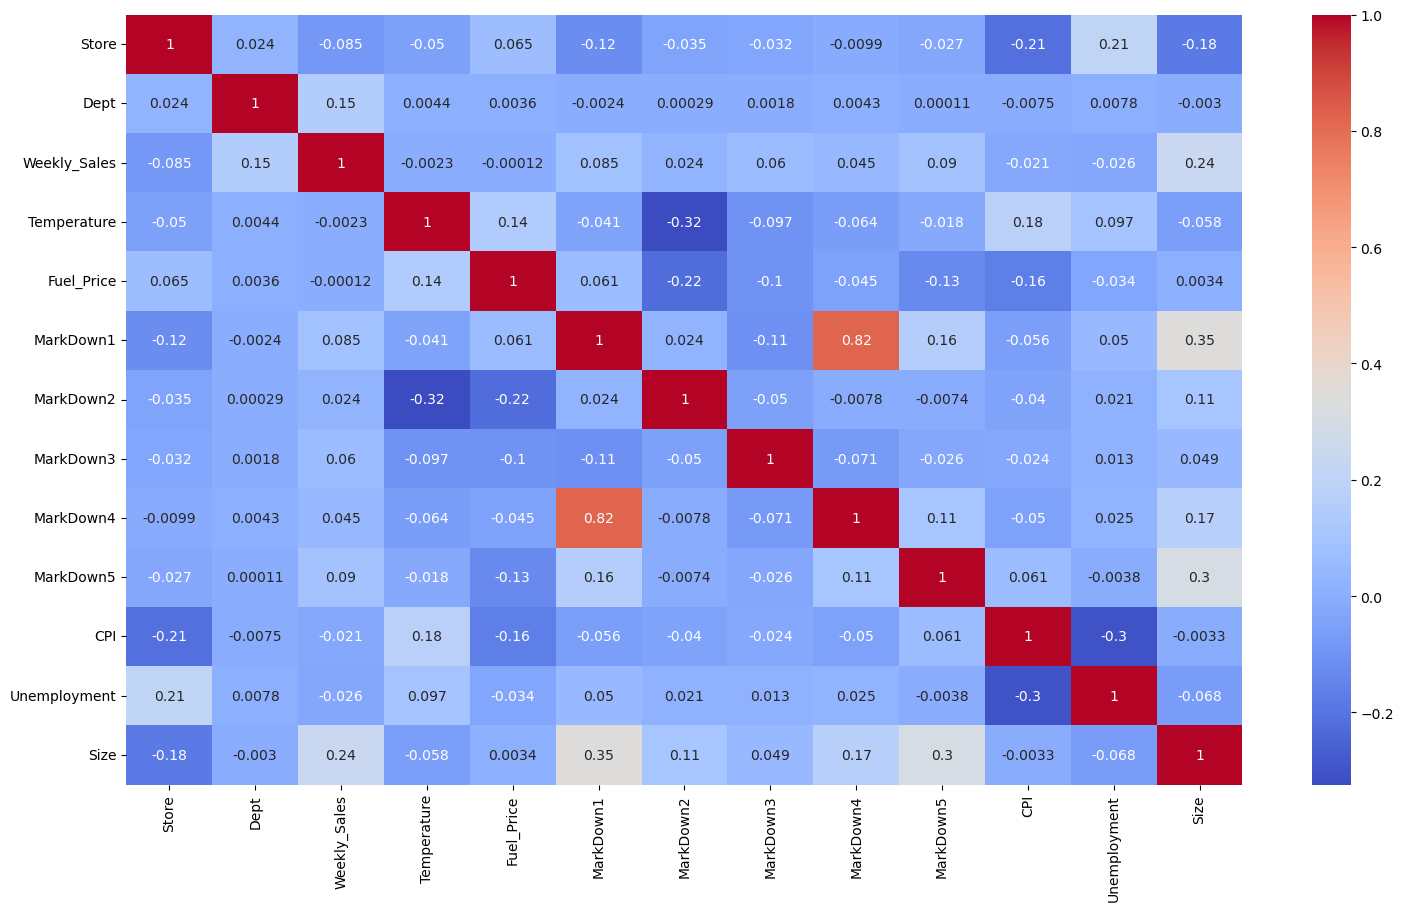

In [160]:
plt.figure(figsize=(18,10))
sns.heatmap(df_num.corr(), annot=True, cmap='coolwarm')
plt.show()

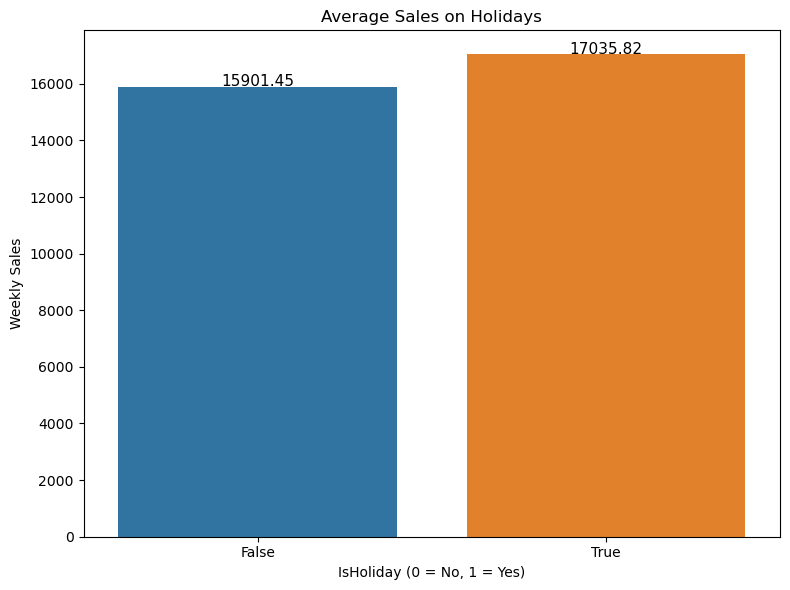

In [161]:
plt.figure(figsize=(8, 6))

# Create the barplot
ax = sns.barplot(x='IsHoliday', y='Weekly_Sales', data=df, ci=None)

# Add labels on top of bars
for bar in ax.patches:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height + 5, f'{height:.2f}',
            ha='center', fontsize=11)

# Set titles and labels
plt.title('Average Sales on Holidays')
plt.xlabel('IsHoliday (0 = No, 1 = Yes)')
plt.ylabel('Weekly Sales')

plt.tight_layout()
plt.show()


In [162]:
## Data Pre-Processing

In [163]:
# Checking for missing values in the dataset
def check_missing_values(df):
    missing_values = df.isnull().sum()
    if missing_values.any():
        print("Columns with missing values:")
        print(missing_values[missing_values > 0])
    else:
        print("There are no missing values in the dataset.")
check_missing_values(df)

Columns with missing values:
MarkDown1    270889
MarkDown2    310322
MarkDown3    284479
MarkDown4    286603
MarkDown5    270138
dtype: int64


In [164]:
df = df.fillna(0)

In [165]:
df.isna().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
Type            0
Size            0
dtype: int64

In [166]:
print(df[df.isna().any(axis=1)])

Empty DataFrame
Columns: [Store, Dept, Date, Weekly_Sales, IsHoliday, Temperature, Fuel_Price, MarkDown1, MarkDown2, MarkDown3, MarkDown4, MarkDown5, CPI, Unemployment, Type, Size]
Index: []


In [167]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Store,421570.0,22.200546,12.785297,1.000,11.000000,22.00000,33.000000,45.000000
Dept,421570.0,44.260317,30.492054,1.000,18.000000,37.00000,74.000000,99.000000
Weekly_Sales,421570.0,15981.258123,22711.183519,-4988.940,2079.650000,7612.03000,20205.852500,693099.360000
Temperature,421570.0,60.090059,18.447931,-2.060,46.680000,62.09000,74.280000,100.140000
Fuel_Price,421570.0,3.361027,0.458515,2.472,2.933000,3.45200,3.738000,4.468000
MarkDown1,421570.0,2590.074819,6052.385934,0.000,0.000000,0.00000,2809.050000,88646.760000
MarkDown2,421570.0,879.974298,5084.538801,-265.760,0.000000,0.00000,2.200000,104519.540000
MarkDown3,421570.0,468.087665,5528.873453,-29.100,0.000000,0.00000,4.540000,141630.610000
MarkDown4,421570.0,1083.132268,3894.529945,0.000,0.000000,0.00000,425.290000,67474.850000
MarkDown5,421570.0,1662.772385,4207.629321,0.000,0.000000,0.00000,2168.040000,108519.280000


**Conclusion :** <br>
There is no significant difference between handling missing values or not, except for the Markdown 1-5 columns, where missing values are present only in those columns.

### **B. Filtering Data**

In [168]:
df.loc[df['Weekly_Sales']<=0]

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
188,1,47,2010-02-19,-863.00,False,39.93,2.514,0.00,0.00,0.00,0.00,0.00,211.289143,8.106,A,151315
406,1,47,2010-03-12,-698.00,False,57.79,2.667,0.00,0.00,0.00,0.00,0.00,211.380643,8.106,A,151315
2549,1,47,2010-10-08,-58.00,False,63.93,2.633,0.00,0.00,0.00,0.00,0.00,211.746754,7.838,A,151315
3632,1,54,2011-01-21,-50.00,False,44.04,3.016,0.00,0.00,0.00,0.00,0.00,211.827234,7.742,A,151315
4132,1,47,2011-03-11,0.00,False,53.56,3.459,0.00,0.00,0.00,0.00,0.00,214.111056,7.742,A,151315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420066,45,49,2012-05-25,-4.97,False,67.21,3.798,5370.39,0.00,361.22,1287.62,2461.81,191.002810,8.567,B,118221
420403,45,49,2012-06-29,-34.00,False,75.22,3.506,3291.36,425.60,0.00,314.88,2255.34,191.099246,8.567,B,118221
420736,45,49,2012-08-03,-1.91,False,76.58,3.654,24853.05,39.56,17.96,11142.69,2768.32,191.164090,8.684,B,118221
421007,45,54,2012-08-31,0.00,False,75.09,3.867,23641.30,6.00,92.93,6988.31,3992.13,191.461281,8.684,B,118221


The analysis revealed that there are 1,358 rows out of a total of 421,570 rows with Weekly_Sales values below or equal to zero. These rows were removed to ensure the integrity and accuracy of the analysis and modeling.

In [169]:
df = df.loc[df['Weekly_Sales'] > 0]

In [170]:
pd.options.display.max_columns=100 # to see columns 

Sales_each_store = pd.pivot_table(df, index='Store',
                                    columns='Dept',
                                    values='Weekly_Sales',
                                    aggfunc=np.mean)
display(Sales_each_store)

Dept,1,2,3,4,5,6,7,8,9,10,11,12,13,14,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,54,55,56,58,59,60,65,67,71,72,74,77,78,79,80,81,82,83,85,87,90,91,92,93,94,95,96,97,98,99
Store,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,22513.322937,46102.090420,13150.478042,36964.154476,24257.941119,4836.578944,24566.487413,35718.257622,28062.052238,31033.386364,24919.270629,10566.545315,38692.880490,15268.550909,24151.061329,9196.557902,7834.648839,1259.018531,4091.571538,7808.450559,8052.076154,21623.184685,6187.389720,10152.336783,6767.997273,1374.649650,593.113986,4651.040210,3415.295035,2408.533287,8202.668392,5946.431189,11530.831678,2535.730909,1476.203566,2800.495105,79978.222587,NaN,58510.409161,1064.769650,7940.326224,NaN,4872.724406,23.995070,19662.989860,94.600000,926.927339,11437.931259,NaN,32.712727,2355.439371,93.680769,12817.843357,4000.480629,3372.474476,857.775105,1020.995804,NaN,7436.017343,2732.473357,47390.644895,11652.827413,677.000000,11.500000,33974.792937,17139.314615,29780.696573,20727.860909,5704.048951,3685.875524,46006.277203,82427.547832,64238.943427,135458.969510,71699.182378,63180.568182,120772.062168,33251.831639,35207.348811,11827.770769,306.091081
2,30777.980769,65912.922517,17476.563357,45607.666573,30555.315315,6808.382517,40477.837063,58707.369441,34375.864476,38845.854476,23382.686154,7735.946294,46117.959231,21314.132937,27005.179650,13790.854196,11898.194775,4053.439930,5748.619441,9910.939860,12923.013846,29170.616573,8309.564545,15299.508392,9347.725105,1837.954615,798.913217,7111.482657,4981.155385,3884.756993,11755.096713,7488.096993,17595.203497,3875.588601,2631.750559,4500.250769,85114.996014,2.340000,78174.560210,2592.220769,8768.857692,NaN,7245.541189,31.909531,29675.324545,360.269231,1368.212754,15568.465664,NaN,16.226667,4148.373566,110.131154,13060.297692,5545.122308,21610.019091,1391.520559,223.560000,NaN,12125.255594,4634.609371,72929.496643,16986.406014,817.500000,11.764000,32759.096993,26041.273566,31000.484266,24647.232587,5710.719650,3672.042797,24932.985804,97611.537133,80610.380350,164840.230979,70581.977063,70018.672517,143588.751888,34319.063846,40697.204056,14035.400839,517.552564
3,7328.621049,16841.775664,5509.300769,8434.186503,11695.366573,2012.411818,10044.341608,8310.254196,9062.007692,10871.944126,8774.928042,2383.603007,11363.061678,4626.649021,7871.568322,2634.199650,2960.677739,731.313147,1682.199231,1244.529650,3101.769860,10913.330070,2763.627343,4260.447972,2850.050839,500.193636,166.870070,1517.404056,1243.926993,878.475455,4333.470704,3228.155105,4579.719161,1439.325524,627.074507,NaN,108598.364126,NaN,18203.108252,646.832028,4422.944406,NaN,2133.657762,9.922500,6179.259510,55.571429,NaN,17.581481,NaN,5.411803,961.390210,59.947477,7153.737902,1606.808881,NaN,253.352353,138.125874,NaN,2021.482657,1101.610000,22796.856573,3374.960769,640.980000,6.000000,7230.372448,24.420476,1429.300070,6746.578392,19.330000,874.128182,939.435455,1540.049161,318.685594,7568.280210,NaN,656.294444,15745.528252,3934.540000,343.437357,30.570833,NaN
4,36979.940070,93639.315385,19012.491678,56603.400140,45668.406783,8241.777692,50728.151399,62949.723776,34437.170979,37269.667413,27145.836643,8141.910979,69596.447343,28567.509441,21270.153007,15815.878042,13253.433740,3038.317762,8888.302867,8865.273147,17289.916294,46234.012867,10875.301189,15640.748531,18429.759930,2579.906154,916.232238,9472.121189,7683.686783,3813.243986,13685.430350,12304.056224,25142.675385,4376.574755,3005.231469,3640.752727,80093.946084,1.560000,78729.263077,975.417622,9511.818531,NaN,5441.563566,13.696939,39128.896154,180.107778,2324.615532,6911.676643,NaN,8.200000,3721.521329,131.887000,18662.627203,6040.540839,6078.142308,1586.446993,410.795105,NaN,12471.426713,7686.018741,101244.450839,20627.307762,344.571429,5.375000,52436.656923,19379.101399,31055.285315,29371.320979,9161.217343,2730.060000,14223.462308,8

In [171]:
### **C. Feature Engineering**

In [172]:
public_holiday = df.loc[df['IsHoliday']==True]
public_holiday['Date'].unique() 

array(['2010-02-12', '2010-09-10', '2010-11-26', '2010-12-31',
       '2011-02-11', '2011-09-09', '2011-11-25', '2011-12-30',
       '2012-02-10', '2012-09-07'], dtype=object)

In [173]:
regular_day = df.loc[df['IsHoliday']==False]
regular_day['Date'].nunique() 

133

* **Create new features : Super Bowl, Labor Day, Thanksgiving and Christmas**

In [174]:
# Super bowl dates in train set
df.loc[(df['Date'] == '2010-02-12')|(df['Date'] == '2011-02-11')|(df['Date'] == '2012-02-10'),'Super_Bowl'] = True
df.loc[(df['Date'] != '2010-02-12')&(df['Date'] != '2011-02-11')&(df['Date'] != '2012-02-10'),'Super_Bowl'] = False

In [175]:
# Labor day dates in train set
df.loc[(df['Date'] == '2010-09-10')|(df['Date'] == '2011-09-09')|(df['Date'] == '2012-09-07'),'Labor_Day'] = True
df.loc[(df['Date'] != '2010-09-10')&(df['Date'] != '2011-09-09')&(df['Date'] != '2012-09-07'),'Labor_Day'] = False

In [176]:
# Thanksgiving dates in train set
df.loc[(df['Date'] == '2010-11-26')|(df['Date'] == '2011-11-25'),'Thanksgiving'] = True
df.loc[(df['Date'] != '2010-11-26')&(df['Date'] != '2011-11-25'),'Thanksgiving'] = False

In [177]:
#Christmas dates in train set
df.loc[(df['Date'] == '2010-12-31')|(df['Date'] == '2011-12-30'),'Christmas'] = True
df.loc[(df['Date'] != '2010-12-31')&(df['Date'] != '2011-12-30'),'Christmas'] = False

* **Create new features : Week, Month and Year**

In [178]:
df["Date"] = pd.to_datetime(df["Date"])

In [179]:
df['week'] =df["Date"].dt.isocalendar().week
df['month'] =df['Date'].dt.month 
df['year'] =df['Date'].dt.year

In [180]:
### **D. Feature Encoding**

In [181]:
#convert from boolean to numeric
df['IsHoliday'] = df['IsHoliday'].astype(int)
df['IsHoliday'] = pd.to_numeric(df['IsHoliday'], errors='coerce')

In [182]:
df['IsHoliday'] = df['IsHoliday'].astype(int)
df['IsHoliday'] = pd.to_numeric(df['IsHoliday'], errors='coerce')

In [183]:
df["Date"] = pd.to_datetime(df["Date"])

In [184]:
df['Type'] = df['Type'].apply(lambda x: 1 if x == 'A' else 2 if x == 'B' else 3)

* **Changing Boolean to Numerical**

In [185]:
df['Super_Bowl'] = df['Super_Bowl'].astype(bool).astype(int) # changing T,F to 0-1
df['Thanksgiving'] = df['Thanksgiving'].astype(bool).astype(int) # changing T,F to 0-1
df['Labor_Day'] = df['Labor_Day'].astype(bool).astype(int) # changing T,F to 0-1
df['Christmas'] = df['Christmas'].astype(bool).astype(int) # changing T,F to 0-1
df['IsHoliday'] = df['IsHoliday'].astype(bool).astype(int) # changing T,F to 0-1

In [186]:
df.head(5)

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Super_Bowl,Labor_Day,Thanksgiving,Christmas,week,month,year
0,1,1,2010-02-05,24924.50,0,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,1,151315,0,0,0,0,5,2,2010
1,1,2,2010-02-05,50605.27,0,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,1,151315,0,0,0,0,5,2,2010
2,1,3,2010-02-05,13740.12,0,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,1,151315,0,0,0,0,5,2,2010
3,1,4,2010-02-05,39954.04,0,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,1,151315,0,0,0,0,5,2,2010
4,1,5,2010-02-05,32229.38,0,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,1,151315,0,0,0,0,5,2,2010


In [187]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 420212 entries, 0 to 421569
Data columns (total 23 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         420212 non-null  int64         
 1   Dept          420212 non-null  int64         
 2   Date          420212 non-null  datetime64[ns]
 3   Weekly_Sales  420212 non-null  float64       
 4   IsHoliday     420212 non-null  int32         
 5   Temperature   420212 non-null  float64       
 6   Fuel_Price    420212 non-null  float64       
 7   MarkDown1     420212 non-null  float64       
 8   MarkDown2     420212 non-null  float64       
 9   MarkDown3     420212 non-null  float64       
 10  MarkDown4     420212 non-null  float64       
 11  MarkDown5     420212 non-null  float64       
 12  CPI           420212 non-null  float64       
 13  Unemployment  420212 non-null  float64       
 14  Type          420212 non-null  int64         
 15  Size          420

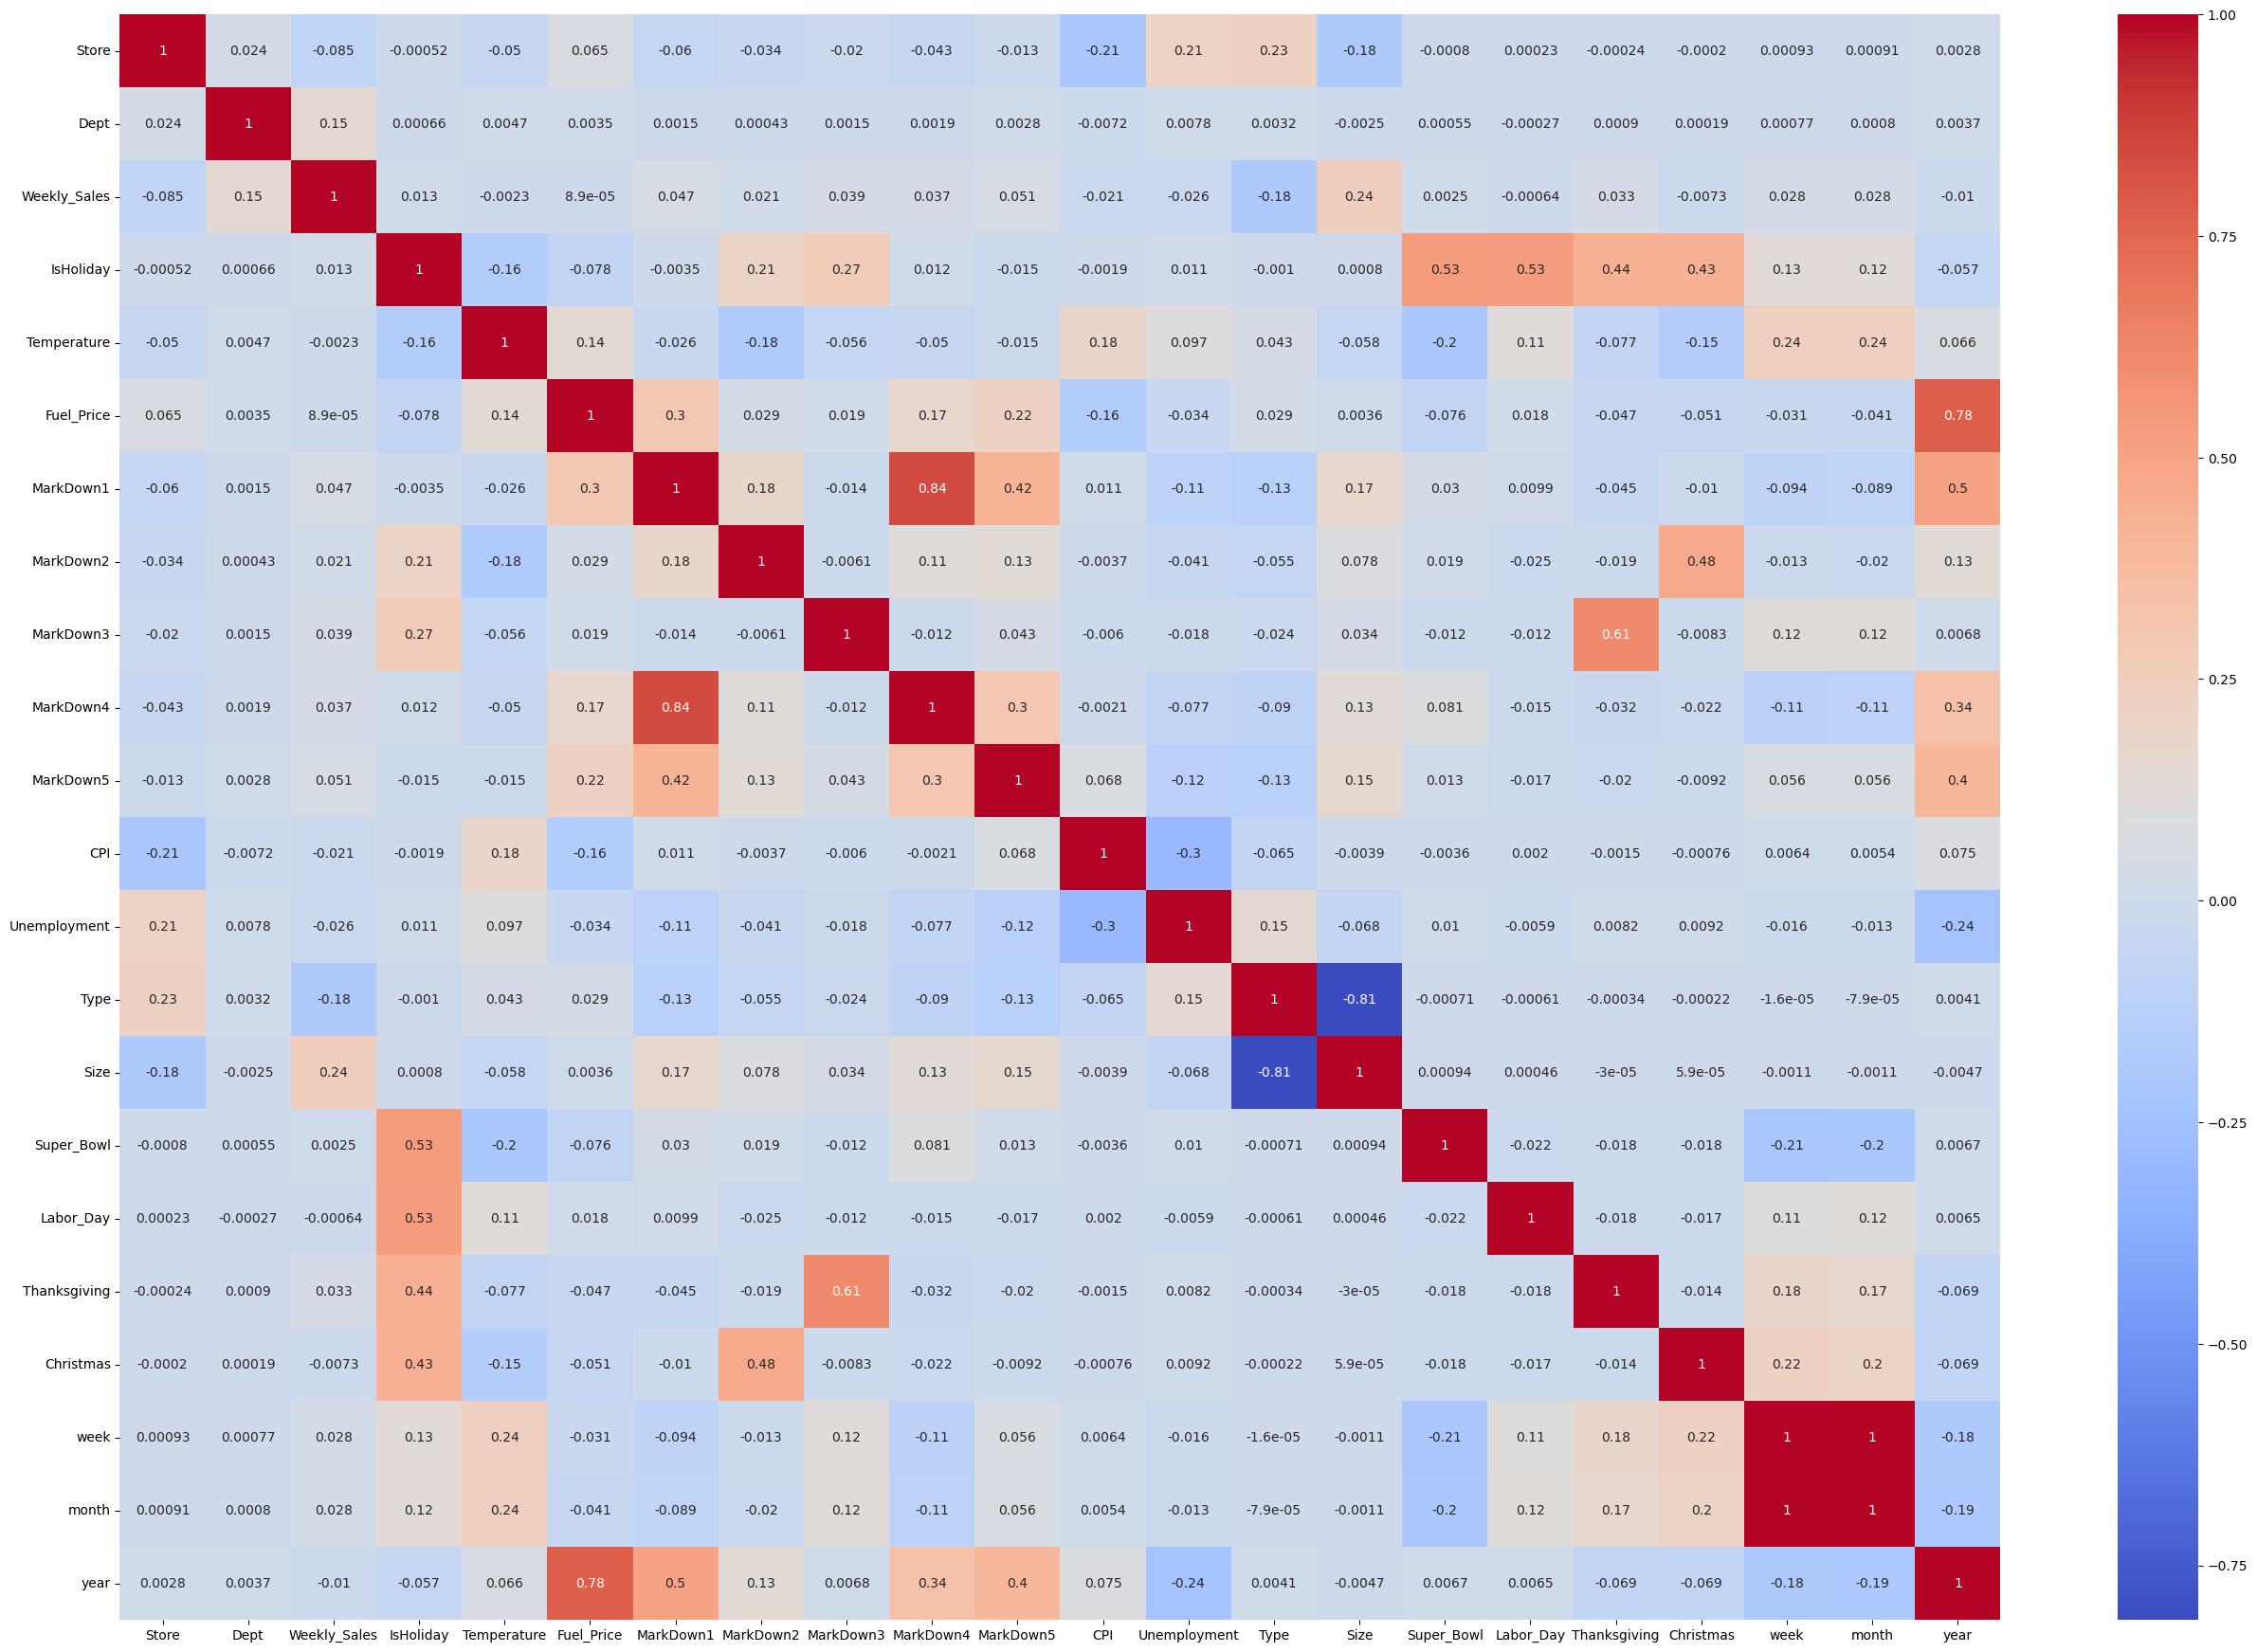

In [188]:
plt.figure(figsize=(32,22))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

**Sales Trend Over Time**

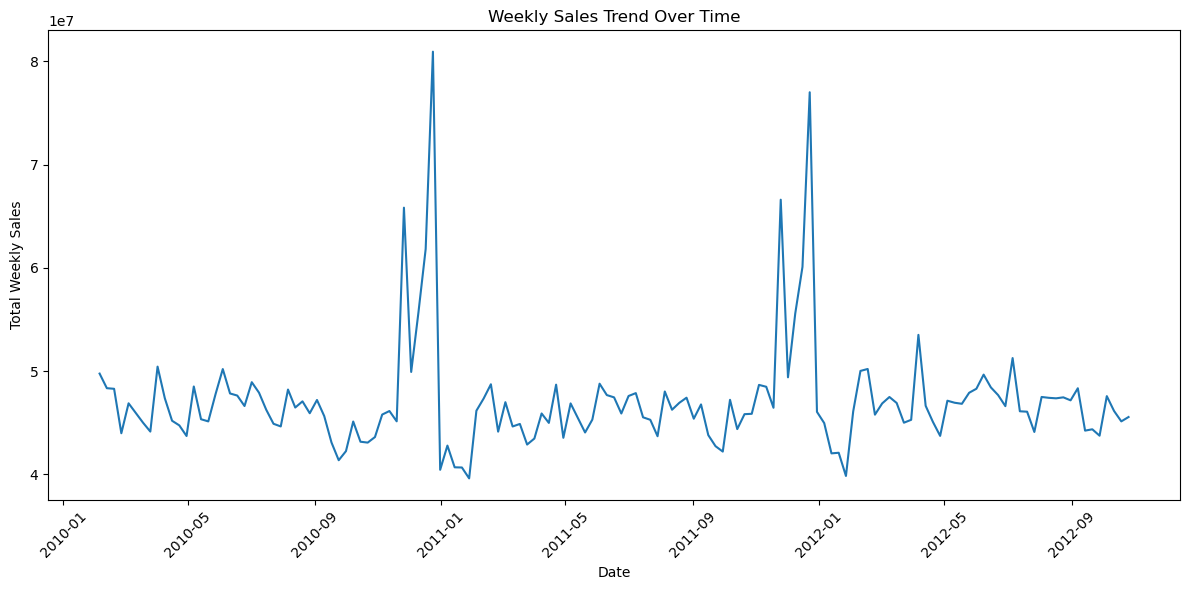

In [189]:
plt.figure(figsize=(12,6))
df_grouped = df.groupby('Date')['Weekly_Sales'].sum().reset_index()
sns.lineplot(data=df_grouped, x='Date', y='Weekly_Sales')
plt.title('Weekly Sales Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Total Weekly Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**Sales by Store Type**

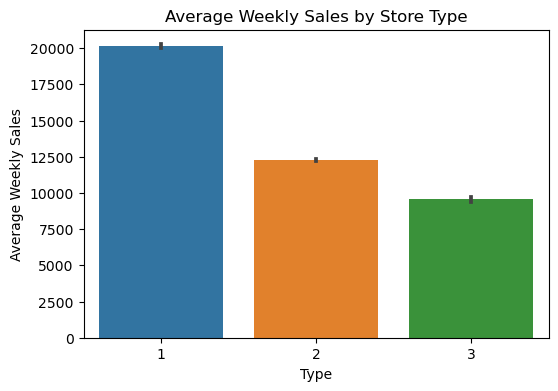

In [190]:

plt.figure(figsize=(6,4))
sns.barplot(data=df, x='Type', y='Weekly_Sales', estimator=np.mean)
plt.title('Average Weekly Sales by Store Type')
plt.ylabel('Average Weekly Sales')
plt.show()

**Sales by Store Size**



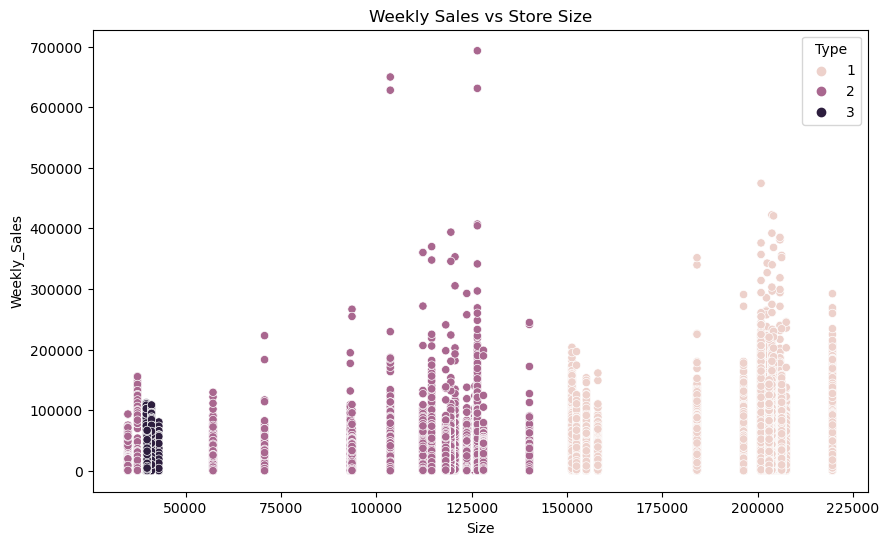

In [191]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Size', y='Weekly_Sales', hue='Type')
plt.title('Weekly Sales vs Store Size')
plt.show()

**Holiday vs Non-Holiday Sales**




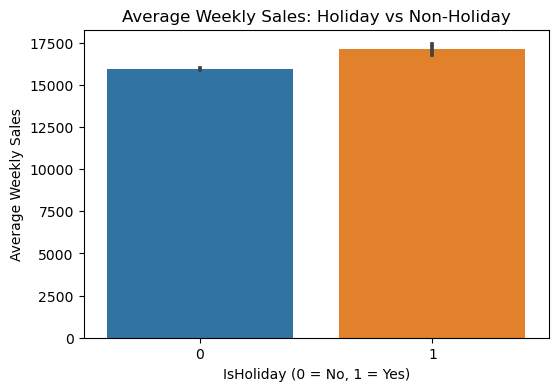

In [192]:

plt.figure(figsize=(6,4))
sns.barplot(data=df, x='IsHoliday', y='Weekly_Sales', estimator=np.mean)
plt.title('Average Weekly Sales: Holiday vs Non-Holiday')
plt.xlabel('IsHoliday (0 = No, 1 = Yes)')
plt.ylabel('Average Weekly Sales')
plt.show()

**Prepare Time Series Data**



<AxesSubplot:title={'center':'Weekly Sales - Store 1 Dept 1'}, xlabel='Date'>

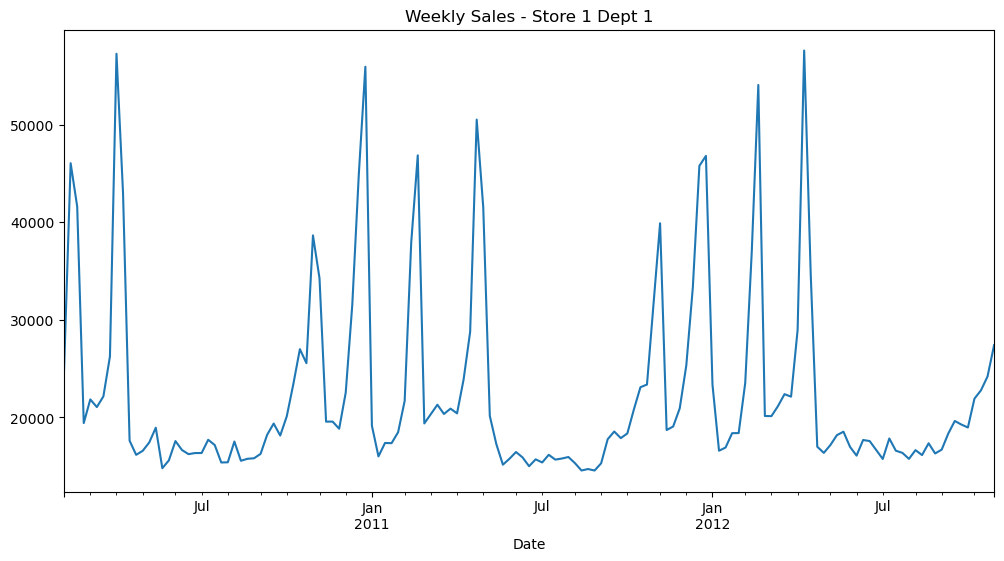

In [193]:
import pandas as pd

# Filter for one store-dept combo
ts_df = df[(df['Store'] == 1) & (df['Dept'] == 1)]

# Sort by date
ts_df = ts_df.sort_values('Date')

# Set date as index
ts_df.set_index('Date', inplace=True)

# Resample by week (optional if already weekly)
ts_df = ts_df['Weekly_Sales'].resample('W').sum()

# Plot
ts_df.plot(figsize=(12,6), title='Weekly Sales - Store 1 Dept 1')


**check for stationarity**

In [194]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(ts_df.dropna())
print('ADF Statistic:', result[0])
print('p-value:', result[1])


ADF Statistic: -2.522163868650038
p-value: 0.1101743228258697


If p-value > 0.05: data is non-stationary → apply differencing

If p-value < 0.05: data is stationary → proceed to modeling



**Fit  ARIMA  Model**

                               SARIMAX Results                                
Dep. Variable:           Weekly_Sales   No. Observations:                  143
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1482.653
Date:                Fri, 11 Apr 2025   AIC                           2971.305
Time:                        19:51:52   BIC                           2980.173
Sample:                    02-07-2010   HQIC                          2974.909
                         - 10-28-2012                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5749      0.045     12.647      0.000       0.486       0.664
ma.L1         -1.0000      0.070    -14.302      0.000      -1.137      -0.863
sigma2      6.699e+07   1.04e-09   6.42e+16      0.0

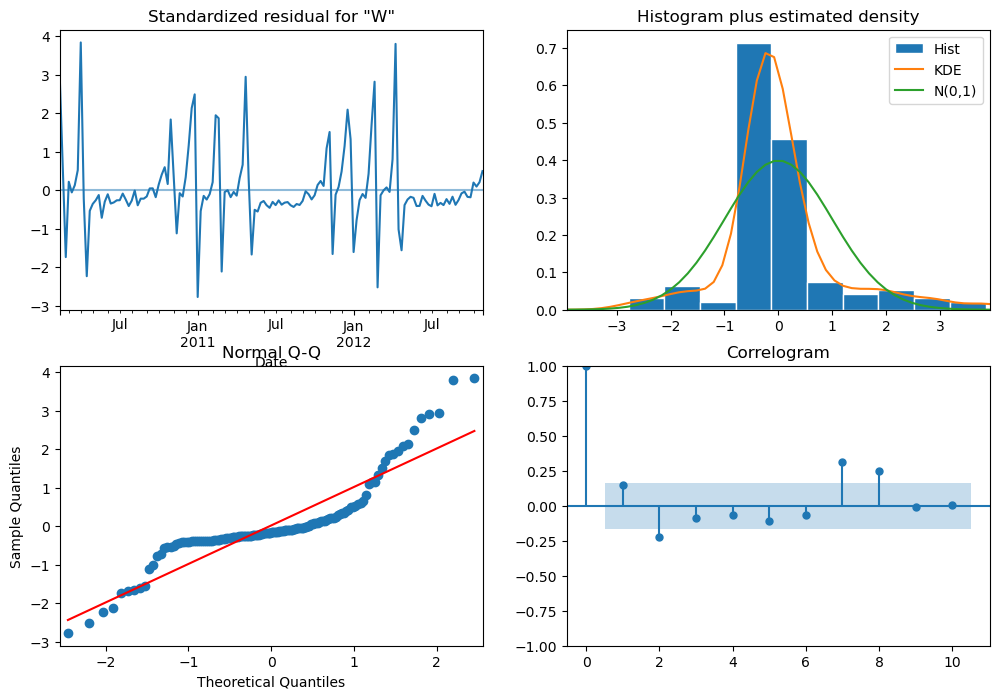

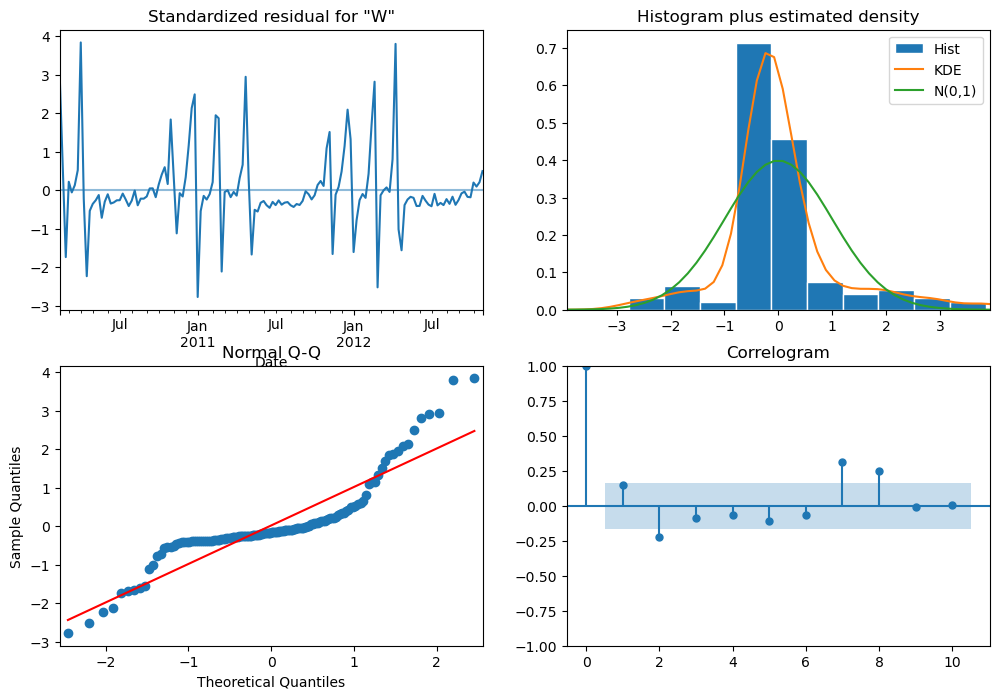

In [195]:

from statsmodels.tsa.arima.model import ARIMA

# If data is non-stationary, use ARIMA(p,d,q) — example: (1,1,1)
model_arima = ARIMA(ts_df, order=(1,1,1))
results_arima = model_arima.fit()

print(results_arima.summary())
results_arima.plot_diagnostics(figsize=(12,8))


**Forecast with ARIMA**

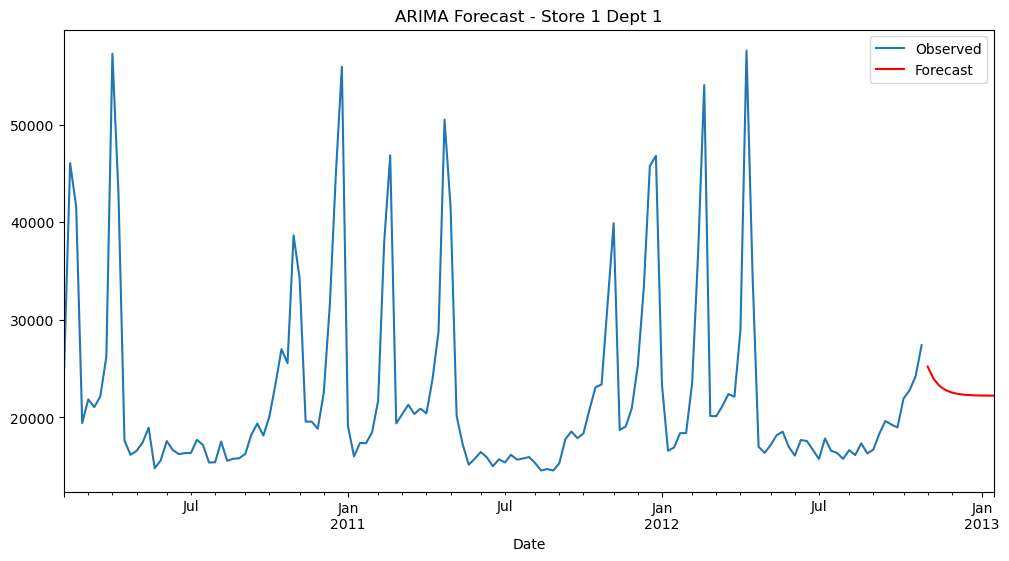

In [196]:


forecast_arima = results_arima.get_forecast(steps=12)
forecast_df = forecast_arima.summary_frame()

# Plot
ts_df.plot(label='Observed', figsize=(12,6))
forecast_df['mean'].plot(label='Forecast', color='r')
plt.title('ARIMA Forecast - Store 1 Dept 1')
plt.legend()

**Fit SARIMA Model (Seasonal ARIMA)**

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                     SARIMAX Results                                      
Dep. Variable:                       Weekly_Sales   No. Observations:                  143
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 52)   Log Likelihood                -930.760
Date:                            Fri, 11 Apr 2025   AIC                           1871.521
Time:                                    19:52:08   BIC                           1884.020
Sample:                                02-07-2010   HQIC                          1876.561
                                     - 10-28-2012                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4587      0.173      2.657      0.008       0.120       0.797
ma.L1         -0.8570      0.089   

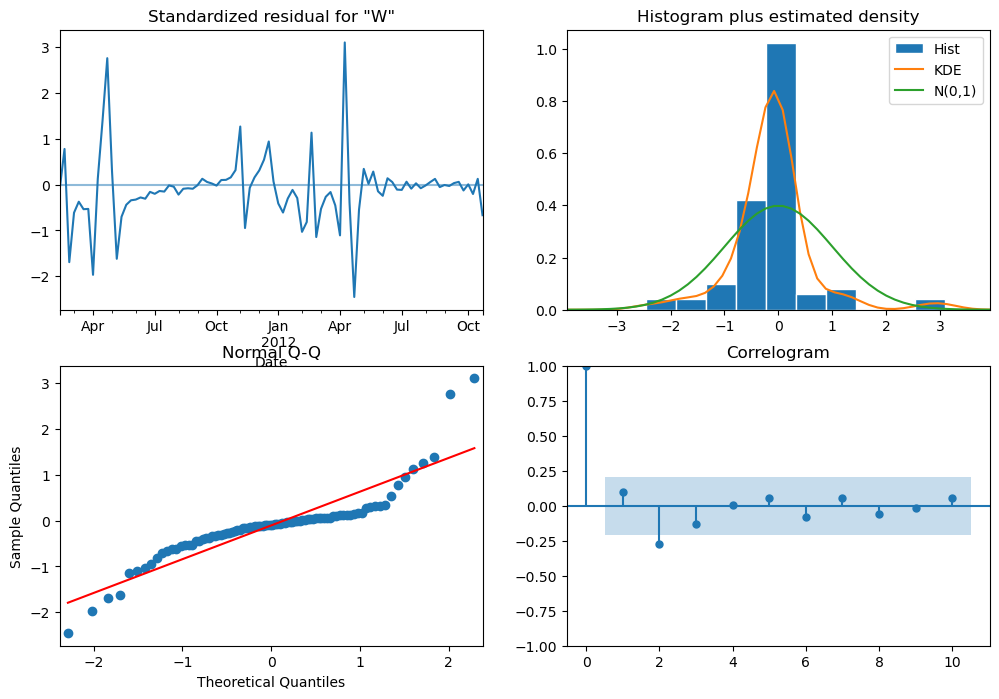

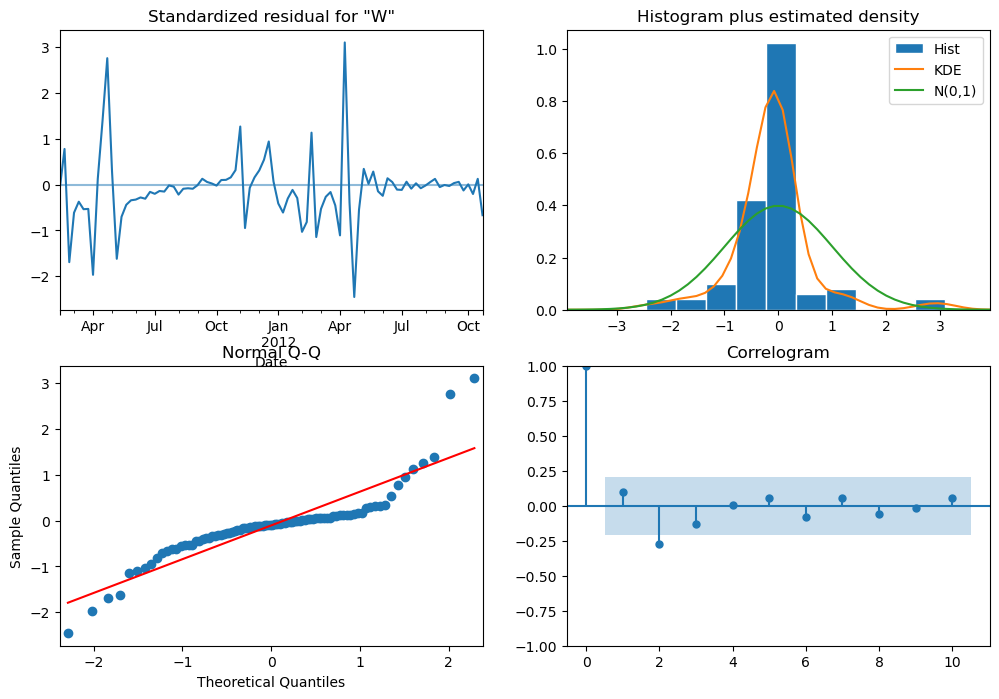

In [197]:


from statsmodels.tsa.statespace.sarimax import SARIMAX

# SARIMA(p,d,q)(P,D,Q,s)
# Let's assume weekly seasonality (s=52)
model_sarima = SARIMAX(ts_df, order=(1,1,1), seasonal_order=(1,1,1,52))
results_sarima = model_sarima.fit()

print(results_sarima.summary())
results_sarima.plot_diagnostics(figsize=(12,8))

**Forecast with SARIMA**

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Weekly_Sales  mean  mean_ci_lower  mean_ci_upper
2012-10-28     0.0  -55953.473989   55953.473989
2012-11-04     0.0  -56295.700317   56295.700317
2012-11-11     0.0  -56635.858756   56635.858756
2012-11-18     0.0  -56973.986343   56973.986343
2012-11-25     0.0  -57310.119024   57310.119024
2012-12-02     0.0  -57644.291698   57644.291698
2012-12-09     0.0  -57976.538256   57976.538256
2012-12-16     0.0  -58306.891624   58306.891624
2012-12-23     0.0  -58635.383802   58635.383802
2012-12-30     0.0  -58962.045898   58962.045898
2013-01-06     0.0  -59286.908160   59286.908160
2013-01-13     0.0  -59610.000017   59610.000017


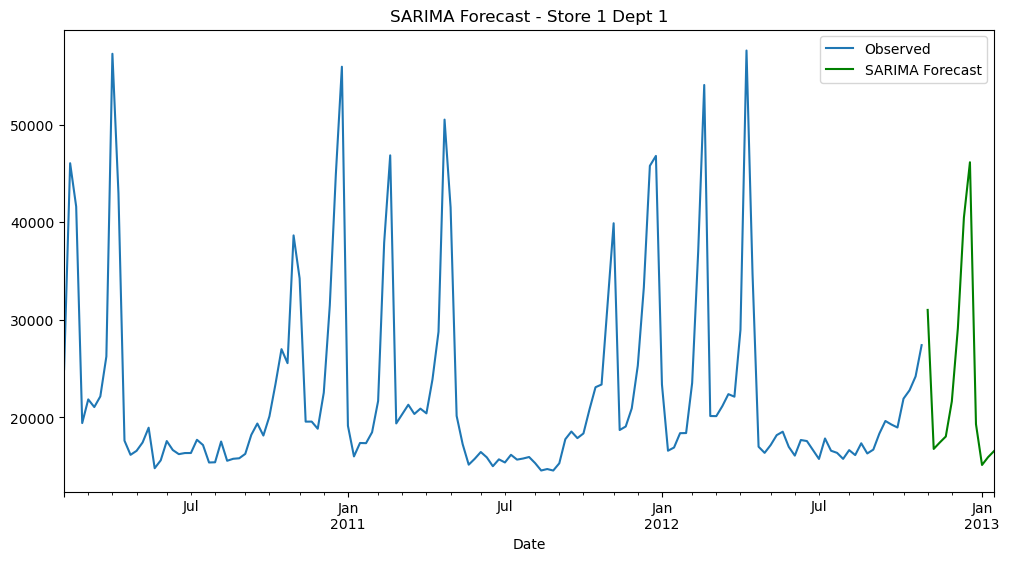

In [198]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Step 1: Set the data - suppose you're forecasting for one store+department
df_model = df[(df['Store'] == 1) & (df['Dept'] == 1)]
df_model = df_model.sort_values('Date')
df_model.set_index('Date', inplace=True)
sales_data = df_model['Weekly_Sales'].asfreq('W').fillna(method='ffill')

# Step 2: Fit the SARIMA model
model = SARIMAX(sales_data, 
                order=(1, 1, 1), 
                seasonal_order=(1, 1, 1, 52), 
                enforce_stationarity=False, 
                enforce_invertibility=False)

results = model.fit()

# Step 3: Forecast next 12 weeks
forecast = results.get_forecast(steps=12)
forecast_df = forecast.summary_frame()

# Step 4: Display forecast values
print(forecast_df[['mean', 'mean_ci_lower', 'mean_ci_upper']])

forecast_sarima = results_sarima.get_forecast(steps=12)
sarima_df = forecast_sarima.summary_frame()

# Plot
ts_df.plot(label='Observed', figsize=(12,6))
sarima_df['mean'].plot(label='SARIMA Forecast', color='green')
plt.title('SARIMA Forecast - Store 1 Dept 1')
plt.legend()

**Conclusion**
<br>In this project, we aimed to predict Walmart's weekly sales using historical data enriched with store information and additional economic and seasonal features. After performing extensive exploratory data analysis (EDA) and visualizations to understand key patterns and trends, we implemented both classical machine learning models and time series forecasting techniques such as SARIMA.</br>

<br>The analysis highlighted that sales are significantly affected by holiday seasons, economic factors like unemployment and CPI, and store-specific characteristics such as type and size. Among the various holidays, events like Christmas and Thanksgiving showed a strong spike in sales.</br>

<br>The SARIMA model was effective in capturing the weekly and seasonal trends, enabling us to forecast future sales with reasonable accuracy. The predicted values provide valuable insights for Walmart's inventory planning, marketing strategies, and investment decisions.</br>

<br>Overall, this project demonstrates the importance of combining domain knowledge, data analytics, and time series forecasting to support data-driven decision-making in the retail sector.</br>

